####Import Python libraries 

In [1]:
import matplotlib.pylab as plt
from time import time
import numpy as np
import pandas as pd
import os
from collections import Counter,defaultdict
from time import time
import pickle
import sys
import json
%matplotlib inline

####Import user defined library

In [2]:
import extract_image_features as extract

####Get image file names

In [3]:
image_file_name_path = "/Users/Alexander/NASA/NASA_Sample_Data/Images/"
filelist = extract.get_image_file_name_path(image_file_name_path)
print "Total number of files = {}.".format(len(filelist))

Total number of files = 413.


####Representative Image Samples

8 evenly spaced sample images were processed in order to get a diverse set of images that are representative of the diversity of sunspot behavior

The small block of code for this is located in extract_feautres_script.py

In [4]:
# image indices used 
np.arange(1, 400, 50)

array([  1,  51, 101, 151, 201, 251, 301, 351])

####Get mapped image data

In [5]:
trans_image_path = "/Users/Alexander/NASA/trans_image_data_test/"
trans_filenames_test = extract.get_image_trans_filenames(trans_image_path)
print "{} even spaced sample images".format(len(trans_filenames_test )- 1)
trans_filenames_test

8 even spaced sample images


['.DS_Store',
 'fd_M_96m_01d_3925_0001.pk',
 'fd_M_96m_01d_3929_0013.pk',
 'fd_M_96m_01d_3933_0011.pk',
 'fd_M_96m_01d_3937_0002.pk',
 'fd_M_96m_01d_3940_0007.pk',
 'fd_M_96m_01d_3944_0007.pk',
 'fd_M_96m_01d_3947_0012.pk',
 'fd_M_96m_01d_3951_0002.pk']

In [6]:
trans_image_path = "/Users/Alexander/NASA/trans_image_data_test/"
trans_images = extract.get_trans_image(trans_image_path, trans_filenames_test)

print "{} mapped image files".format(len(trans_images))
print type(trans_images[0])
print trans_images[0].shape
print trans_images[0]

8 mapped image files
<type 'numpy.ndarray'>
(1024, 1024)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


####Get extracted features from file

In [8]:
path_results = "/Users/Alexander/NASA/feature_extraction_results_test/"
feats = extract.get_features(path_results)

####Convert centroid positions into Longitude & Latitude 

In [9]:
new_feat_objects = [extract.map_centroids_long_lat(feat) for feat in feats]

In [10]:
new_feat_objects[0]

{1: {'lat_neg': -13.93,
  'lat_pos': -14.04,
  'long_neg': 280.85,
  'long_pos': 279.21,
  'neg_net_flux': -197.46,
  'pos_net_flux': 297568.0,
  'x_neg_ave': 423.26,
  'x_pos_ave': 413.9,
  'y_neg_ave': 388.73,
  'y_pos_ave': 387.76},
 2: {'lat_neg': -8.63,
  'lat_pos': -8.76,
  'long_neg': 222.45,
  'long_pos': 222.41,
  'neg_net_flux': -58842.4,
  'pos_net_flux': 2537983.48,
  'x_neg_ave': 91.02,
  'x_pos_ave': 90.77,
  'y_neg_ave': 435.15,
  'y_pos_ave': 433.94},
 3: {'lat_neg': -7.43,
  'lat_pos': -7.31,
  'long_neg': 238.91,
  'long_pos': 238.0,
  'neg_net_flux': -122593.32,
  'pos_net_flux': 121496.19,
  'x_neg_ave': 184.67,
  'x_pos_ave': 179.47,
  'y_neg_ave': 445.75,
  'y_pos_ave': 446.82},
 4: {'lat_neg': -5.08,
  'lat_pos': -4.27,
  'long_neg': 333.91,
  'long_pos': 332.57,
  'neg_net_flux': -66751.8,
  'pos_net_flux': 13283.0,
  'x_neg_ave': 725.1,
  'x_pos_ave': 717.5,
  'y_neg_ave': 466.65,
  'y_pos_ave': 473.86},
 5: {'lat_neg': 3.21,
  'lat_pos': 3.97,
  'long_neg': 6.

####Load NOAA Sunspot Files

In [11]:
# noaa_year = '2003'
# noaa_path = "/Users/Alexander/NASA/MDI_data/rgn{}.txt".format(noaa_year)
noaa_path = "/Users/Alexander/NASA/MDI_data/"
# noaa_data is a dictionary
noaa_data = extract.get_noaa_sunspot_files(noaa_path)

In [12]:
# view years
print "Years range from {} to {}".format(noaa_data.keys()[0], noaa_data.keys()[-1])

Years range from 1997 to 2012


####Look at a single Image for Debugging

####Get Active Region Numbers 

In [13]:
x_cents, y_cents, ar_cents = extract.get_image_active_region_centroids(new_feat_objects[7])

In [14]:
ar_cents

[[285.11, -16.884999999999998],
 [355.85, 4.085],
 [255.74, 11.18],
 [297.005, -12.615],
 [293.725, 7.67]]

In [47]:
# choose the kth image out of the list of sample images
k = 7
print new_feat_objects[k]['image_date']
print new_feat_objects[k]['image_time']
print new_feat_objects[k]['image_date'][0:4]
current_year = new_feat_objects[k]['image_date'][0:4]
# date syntax used to scan df
print "Scan date ","".join(new_feat_objects[k]['image_date'].split())
scan_year = "".join(new_feat_objects[k]['image_date'].split())

2003 10 27
03:11:03
2003
Scan date  20031027


In [17]:
# |date|  |ar_num| |lat/long| |clon| |area(Msolar-hemishpere)|
df = pd.DataFrame(noaa_data[current_year])
df.columns = ["date", 'activeRegionNum', "latLong", "clon", "area", 5,6,7,8]
df = df[["date", 'activeRegionNum', "latLong", "clon", "area"]]

####Get active region numbers from NOAA data set

In [18]:
# get the "N" and "S"
# if char == "S", then lat value is negative 
# fix get_centroids 
df[scan_year == df.date]

,date,activeRegionNum,latLong,clon,area
1814,20031027,10484,N03W54,355,1440
1815,20031027,10486,S16E18,283,2180
1816,20031027,10487,N14E46,255,0240
1817,20031027,10488,N09E09,292,0270
1818,20031027,10489,S11E05,296,0030
1819,20031027,10490,S10E25,276,0050
1820,20031027,10491,S06E09,292,0050
1821,20031027,10492,S22W20,321,0010


In [19]:
# these are NOAA active region centroid 
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year)

In [23]:
# NOAA active region coordinates
print nova_cents

[[355, 3], [283, 16], [255, 14], [292, 9], [296, 11], [276, 10], [292, 6], [321, 22]]


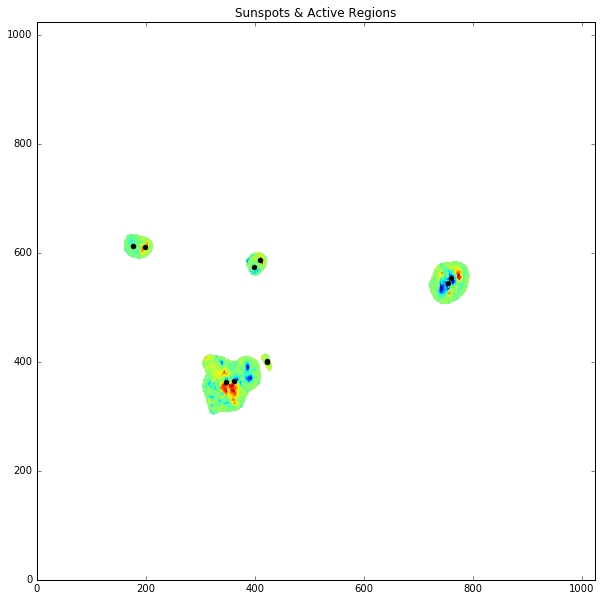

In [24]:
plt.figure(figsize = (10,10));
test_plot_diff  = np.ma.masked_where(trans_images[k] == 0.0, trans_images[k] )
#for key, value in results.iteritems():
    #print key, value[0]
    #print key, value[0][0], value[0][1], value[0][2], value[0][3]
for index in new_feat_objects[k].keys()[0:-4]:
    plt.scatter(new_feat_objects[k][index]["x_pos_ave"],new_feat_objects[k][index]["y_pos_ave"], c='k', marker ='o');
    plt.scatter(new_feat_objects[k][index]["x_neg_ave"],new_feat_objects[k][index]["y_neg_ave"], c='k', marker ='o');
    #plt.scatter(value[0][3],  value[0][7], c='k')
    
plt.imshow(test_plot_diff, interpolation='none', origin='lower');
plt.title("Sunspots & Active Regions");
plt.show();

In [25]:
df[scan_year == df.date]

,date,activeRegionNum,latLong,clon,area
1814,20031027,10484,N03W54,355,1440
1815,20031027,10486,S16E18,283,2180
1816,20031027,10487,N14E46,255,0240
1817,20031027,10488,N09E09,292,0270
1818,20031027,10489,S11E05,296,0030
1819,20031027,10490,S10E25,276,0050
1820,20031027,10491,S06E09,292,0050
1821,20031027,10492,S22W20,321,0010


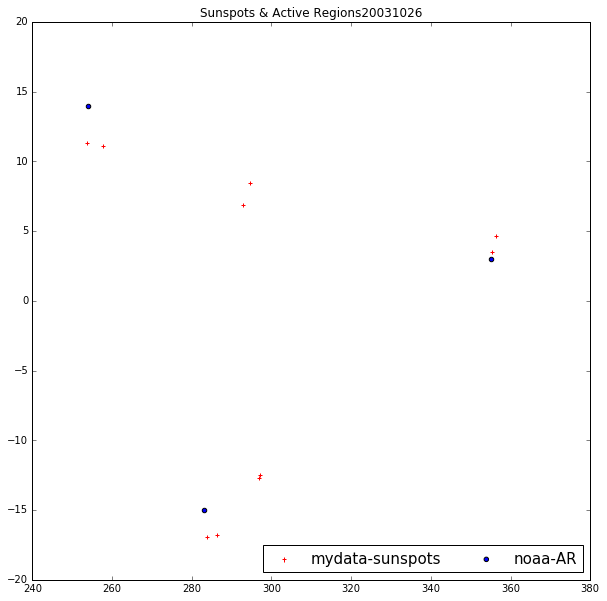

In [45]:
scan_year = "20031026"
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year)
# are we masking 
# TODO !!
# compare image data with NOAA data from the day before !!!!!
# recall, noaa collects data from the end of the day
plt.figure(figsize=(10,10))
noaa = plt.scatter(nova_x, nova_y, c='b', marker='o');
me = plt.scatter(x_cents, y_cents , c='r',marker='+');
plt.title("Sunspots & Active Regions" + scan_year);
plt.legend((me, noaa),
           ('mydata-sunspots', 'noaa-AR'),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=15);

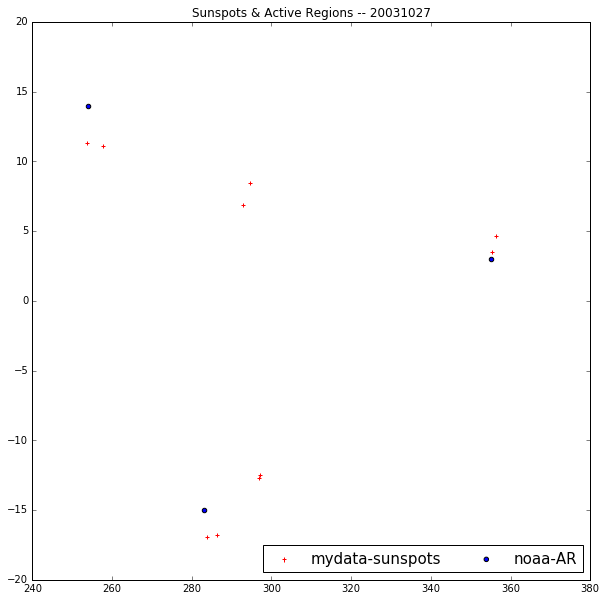

In [27]:
# are we masking 
# TODO !!
# compare image data with NOAA data from the day before !!!!!
# recall, noaa collects data from the end of the day
# look at several consecutive days 
plt.figure(figsize=(10,10))
noaa = plt.scatter(nova_x, nova_y, c='b', marker='o');
me = plt.scatter(x_cents, y_cents , c='r',marker='+');
plt.title("Sunspots & Active Regions -- 20031027");
plt.legend((me, noaa),
           ('mydata-sunspots', 'noaa-AR'),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=15);

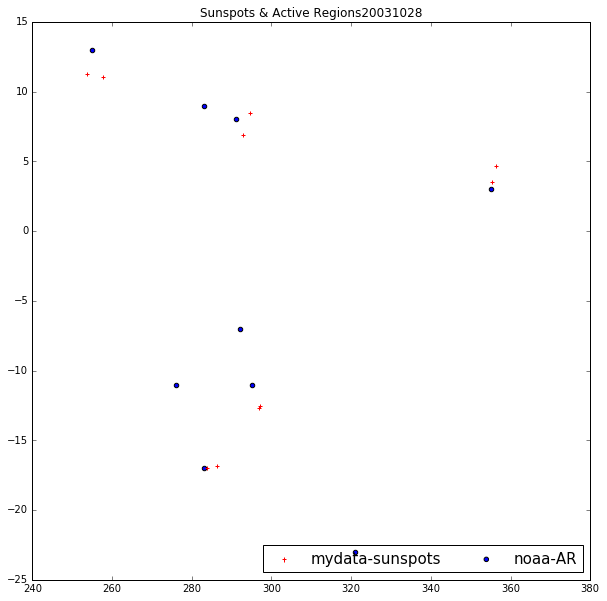

In [28]:
scan_year = "20031028"
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year)
# TODO !!
# compare image data with NOAA data from the day before !!!!!
# recall, noaa collects data from the end of the day
# NOTE: it might be the case that the associated pairs are still 4 degrees seperated !!
#       this is huge! I will have to take a closer look at these cases 
plt.figure(figsize=(10,10))
noaa = plt.scatter(nova_x, nova_y, c='b', marker='o');
me = plt.scatter(x_cents, y_cents , c='r',marker='+');
plt.title("Sunspots & Active Regions" + scan_year);
plt.legend((me, noaa),
           ('mydata-sunspots', 'noaa-AR'),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=15);

# Notes from Meeting with David 
    compare image data with NOAA data from the day before !!!!!
    recall, noaa collects data from the end of the day
    NOTE: it might be the case that the associated pairs are still 4 degrees seperated !!
    this is huge! I will have to take a closer look at these cases 
    
##Side Concern 
    What if AR at day 'd' is assigned label 'l', then the same AR is assigned label "l2" on day "d + n" ??

##ToDO - For a Single Image
    1. Give an active region label to each mydata point
        If mydata point is within a 5 degree radius to a noaa data point
            Then assgin the corresponding active region label
            Then check for one-to-one mydata/noaa active region label assignments
        Else generate a new active region label 
        

In [29]:
from scipy.spatial.distance import  euclidean

In [30]:
def find_repeating_noaa_assignments_(mydata):
    # check for repeating noaa assignments for a single image
    noaa_ar = []
    for mydata_ind, noaaInd_minDist in mydata.iteritems():
        noaa_ar.append(noaaInd_minDist[0].keys()[0])
    
    return noaa_ar

###Get distances between mydata and noaa points 
    Results only contain pairs that have a distance less than 5 degrees

In [31]:
mydata = extract.get_shortest_distance_pair(ar_cents, nova_cents)

In [32]:
for key , value in mydata.iteritems():
    print key, value[0]

1 {0: 1.3783051186149018}
2 {2: 1.9646882704388537}
4 {6: 1.8505472163660344}


##Testing
    Ensure that at most one image active region is assigned to one noaa active region
   
    Case 1: all mydata point are assiged to different noaa active region numbers WORKS.    
    Case 2: n-1 mydata points are assiged to the same noaa active region number WORKS.
    Case 3: all mydata points are assiged to the same noaa active region number WORKS.     
    Case 4: > 1 mydata points are assiged to different noaa active region numbers WORKS.
    Case 5: no pairs assignments WORKS. 

####Case 1: no repeating assignments

In [33]:
# { mydata index : [{ noaa_index : min_dist }] }
dummy_case1 = {1: [{0: 1.47371130144272}], 
                2: [{4: 2.880663985958789}], 
                4: [{2: 2.215203150954781}]}

In [34]:
# WORKS !
extract.check_repeating_noaa_assignments(dummy_case1)

{1: [{0: 1.47371130144272}],
 2: [{4: 2.880663985958789}],
 4: [{2: 2.215203150954781}]}

####Case 2: n-1 mydata points are assiged to the same noaa active region number 

In [35]:
# { mydata index : [{ noaa_index : min_dist }] }
dummy_case2 = {1: [{0: 1.47371130144272}], 
                2: [{2: 2.880663985958789}], 
                4: [{0: 2.215203150954781}]}

In [36]:
# WORKS !
extract.check_repeating_noaa_assignments(dummy_case2)

{1: [{0: 1.47371130144272}], 2: [{2: 2.880663985958789}]}

####Case 3:  all mydata points are assiged to the same noaa active region number

In [37]:
# { mydata index : [{ noaa_index : min_dist }] }
dummy_case3 = {1: [{0: 1.47371130144272}], 
                2: [{0: 2.880663985958789}], 
                4: [{0: 2.215203150954781}]}

In [38]:
# WORKS !
extract.check_repeating_noaa_assignments(dummy_case3)

{1: [{0: 1.47371130144272}]}

####Case 4: more than 1 mydata points are assiged to repated noaa active region numbers 

In [39]:
# { mydata index : [{ noaa_index : min_dist }] }
dummy_case4 = {1: [{0: 1.47371130144272}], 
               2: [{2: 2.880663985958789}], 
               4: [{0: 2.215203150954781}],
               5: [{0: 3.3434343}],
               6: [{1:1.342342}],
               7: [{2: 2.2342352}]}

In [40]:
# WORKS !
extract.check_repeating_noaa_assignments(dummy_case4)

{1: [{0: 1.47371130144272}], 2: [{2: 2.880663985958789}], 6: [{1: 1.342342}]}

####Case 5: no assignments 

In [43]:
dummy_case5  = dict()

In [44]:
# WORKS !
extract.check_repeating_noaa_assignments(dummy_case5)

{}

#Process a Single Day of Images

In [59]:
path_results = "/Users/Alexander/NASA/feature_extraction_results_singleDay/"
feats_singleDay = extract.get_features(path_results)

In [84]:
trans_image_path = "/Users/Alexander/NASA/trans_image_data_singleDay/"
trans_filenames_singleDay = extract.get_image_trans_filenames(trans_image_path)

In [85]:
trans_image_path = "/Users/Alexander/NASA/trans_image_data_singleDay/"
trans_images_singleDay = extract.get_trans_image(trans_image_path, trans_filenames_test)

In [86]:
new_feat_objects_singleDay = [extract.map_centroids_long_lat(feat) for feat in feats_singleDay]

In [87]:
# single image
new_feat_objects_singleDay

[{0: (0, 0),
  2: {'lat_neg': -8.65,
   'lat_pos': -8.83,
   'long_neg': 222.13,
   'long_pos': 222.42,
   'neg_net_flux': -57276.73,
   'pos_net_flux': 2516320.36,
   'x_neg_ave': 84.18,
   'x_pos_ave': 85.88,
   'y_neg_ave': 434.97,
   'y_pos_ave': 433.35},
  3: {'lat_neg': -7.4,
   'lat_pos': -7.36,
   'long_neg': 239.0,
   'long_pos': 238.0,
   'neg_net_flux': -114687.36,
   'pos_net_flux': 116369.65,
   'x_neg_ave': 180.15,
   'x_pos_ave': 174.51,
   'y_neg_ave': 446.01,
   'y_pos_ave': 446.39},
  4: {'lat_neg': -5.08,
   'lat_pos': -4.14,
   'long_neg': 333.96,
   'long_pos': 332.68,
   'neg_net_flux': -76818.28,
   'pos_net_flux': 21061.0,
   'x_neg_ave': 720.38,
   'x_pos_ave': 713.13,
   'y_neg_ave': 466.64,
   'y_pos_ave': 475.01},
  5: {'lat_neg': 3.3,
   'lat_pos': 3.96,
   'long_neg': 6.32,
   'long_pos': 4.13,
   'neg_net_flux': -14762.44,
   'pos_net_flux': 1594988.8,
   'x_neg_ave': 904.46,
   'x_pos_ave': 892.0,
   'y_neg_ave': 541.52,
   'y_pos_ave': 547.41},
  6: {'l

In [93]:
# choose the kth image out of the list of sample images
time_slice = 0
print new_feat_objects_singleDay[time_slice]['image_date']
print new_feat_objects_singleDay[time_slice]['image_time']
print new_feat_objects_singleDay[time_slice]['image_date'][0:4]
current_year = new_feat_objects[time_slice]['image_date'][0:4]

2003 10 01
00:03:03
2003


In [94]:
# date syntax used to scan df
print "Scan date ","".join(new_feat_objects_singleDay[time_slice]['image_date'].split())
scan_year_singleDay = "".join(new_feat_objects_singleDay[time_slice]['image_date'].split())

Scan date  20031001


In [79]:
df[scan_year_singleDay == df.date]

,date,activeRegionNum,latLong,clon,area
1706,20031001,10464,N05W73,356,0480
1707,20031001,10466,S04W50,333,0030
1708,20031001,10467,S05W51,334,0030
1709,20031001,10469,S09W82,005,0040
1710,20031001,10470,S13E04,279,0030
1711,20031001,10471,S08E53,230,0330
1712,20031001,10472,S23W02,285,0020


In [96]:
# these are NOAA active region centroid 
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year_singleDay)

In [98]:
x_cents, y_cents, ar_cents = extract.get_image_active_region_centroids(new_feat_objects_singleDay[time_slice])

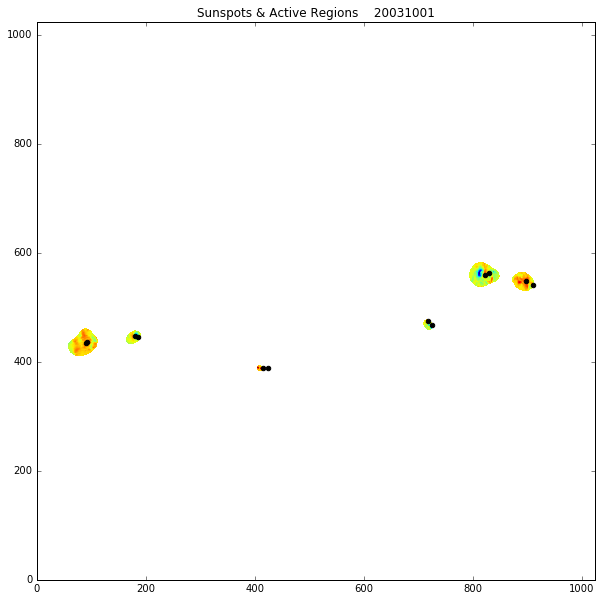

In [100]:
plt.figure(figsize = (10,10));
test_plot_diff  = np.ma.masked_where(trans_images_singleDay[time_slice] == 0.0, trans_images_singleDay[time_slice] )

for index in new_feat_objects[k].keys()[0:-4]:
    plt.scatter(new_feat_objects[time_slice][index]["x_pos_ave"],\
                new_feat_objects[time_slice][index]["y_pos_ave"], c='k', marker ='o');
    plt.scatter(new_feat_objects[time_slice][index]["x_neg_ave"],\
                new_feat_objects[time_slice][index]["y_neg_ave"], c='k', marker ='o');
    #plt.scatter(value[0][3],  value[0][7], c='k')
    
plt.imshow(test_plot_diff, interpolation='none', origin='lower');
plt.title("Sunspots & Active Regions    " + scan_year_singleDay);
plt.show();

##NOAA - End of Previous day as HMI

In [111]:
scan_year_singleDay = "20030001"
# these are NOAA active region centroid 
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year_singleDay)

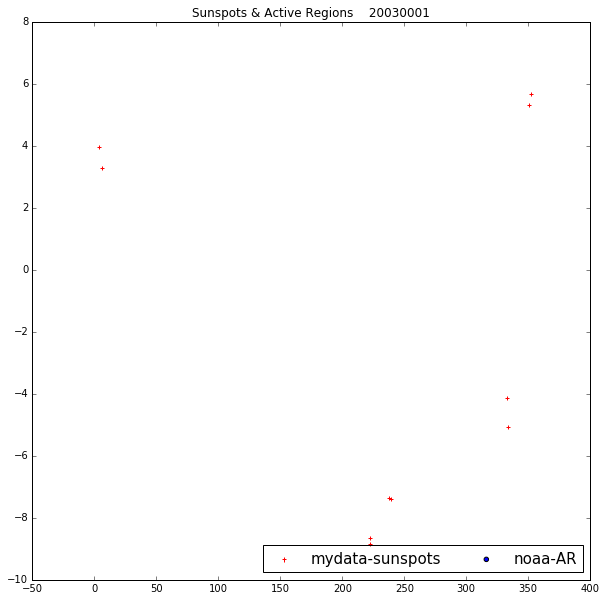

In [113]:
# TODO !!
# compare image data with NOAA data from the day before !!!!!
# recall, noaa collects data from the end of the day
# NOTE: it might be the case that the associated pairs are still 4 degrees seperated !!
#       this is huge! I will have to take a closer look at these cases 
plt.figure(figsize=(10,10))
noaa = plt.scatter(nova_x, nova_y, c='b', marker='o');
me = plt.scatter(x_cents, y_cents , c='r',marker='+');
plt.title("Sunspots & Active Regions    " +  scan_year_singleDay);
plt.legend((me, noaa),
           ('mydata-sunspots', 'noaa-AR'),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=15);

##NOAA - Same day as HMI 

In [114]:
scan_year_singleDay = "20031001"
# these are NOAA active region centroid 
nova_x , nova_y, nova_cents  = extract.get_centroids(df, scan_year_singleDay)

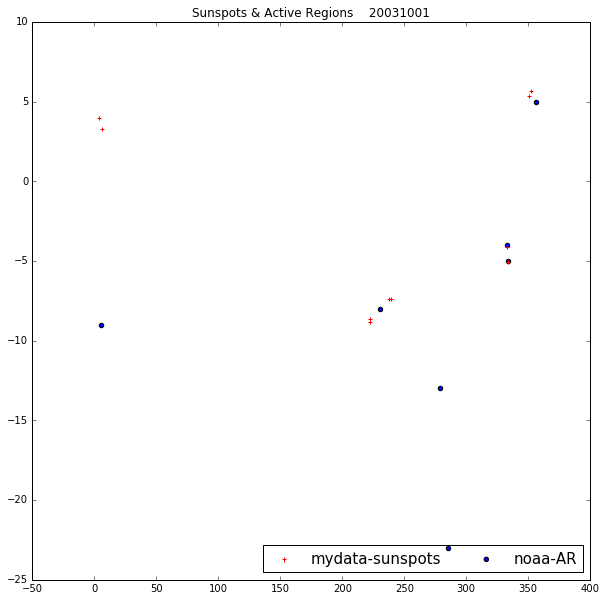

In [115]:
# TODO !!
# compare image data with NOAA data from the day before !!!!!
# recall, noaa collects data from the end of the day
# NOTE: it might be the case that the associated pairs are still 4 degrees seperated !!
#       this is huge! I will have to take a closer look at these cases 
plt.figure(figsize=(10,10))
noaa = plt.scatter(nova_x, nova_y, c='b', marker='o');
me = plt.scatter(x_cents, y_cents , c='r',marker='+');
plt.title("Sunspots & Active Regions    " + scan_year_singleDay);
plt.legend((me, noaa),
           ('mydata-sunspots', 'noaa-AR'),
           scatterpoints=1,
           loc='lower right',
           ncol=2,
           fontsize=15);

###Process all 8 Sample Images